# Plotting PPI with xarray

Creator: Tobias Ahsbahs
Example for plotting scanning lidar PPI scans. Handles removed data (NaNs) in the dataset correctly

- theta (azimuth) and ran (range gate) are arrays descriping a regular grid of the data.
- x,y are cartesian coordinates derived from those measurements
- los is the lidar measurements
- cnr is the carrier to noise ratio that is used for filtering

In [1]:
#Only for development plots
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
#%matplotlib notebook

#This is to set defaul settings
#to find all possible keys use this:
#mpl.rcParams.keys()
mpl.rcParams['figure.figsize'] = (14,7)

In [9]:
import xarray as xr
import numpy as np
from math import pi

In [98]:
# theta and range 
theta = np.arange(0,70,5)
ran = np.arange(50,5000,50)

theta_x = np.resize(np.sin(theta/180*pi),(len(theta),1))
theta_y = np.resize(np.cos(theta/180*pi),(len(theta),1))

x = np.matmul(theta_x,np.resize(ran,(1,len(ran))))
y = np.matmul(theta_y,np.resize(ran,(1,len(ran))))

# Line of sight (replace by actual measurement)
los = np.cos(x/1000) +np.sin(y/500)
# Adding CNR values (created to simulate lower availability at higher ranges)
cnr = np.random.random_sample((len(theta),len(ran))) * -70*np.matmul(np.ones((len(theta),1)),np.resize(ran/5000,(1,len(ran))))

In [103]:
# Creating an xarray dataset object (strucutre derived from netCDF format)
ds = xr.Dataset()
# Variables
ds['LOS'] = (('theta','range'), los)
ds['CNR'] = (('theta','range'), cnr)
# coordinates
ds.coords['x'] = (('theta','range'), x)
ds.coords['y'] = (('theta','range'), y)

# Dimensions
ds['range'] = ran
ds['theta'] = theta

In [104]:
print(ds)

<xarray.Dataset>
Dimensions:  (range: 99, theta: 14)
Coordinates:
    x        (theta, range) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    y        (theta, range) float64 50.0 100.0 150.0 200.0 250.0 300.0 350.0 ...
  * range    (range) int32 50 100 150 200 250 300 350 400 450 500 550 600 ...
  * theta    (theta) int32 0 5 10 15 20 25 30 35 40 45 50 55 60 65
Data variables:
    LOS      (theta, range) float64 1.1 1.199 1.296 1.389 1.479 1.565 1.644 ...
    CNR      (theta, range) float64 -0.6075 -0.6713 -0.02975 -1.929 -2.525 ...


In [100]:
# Removing low cnr values
ds['LOS'] = ds['LOS'].where(-25 < ds.CNR)

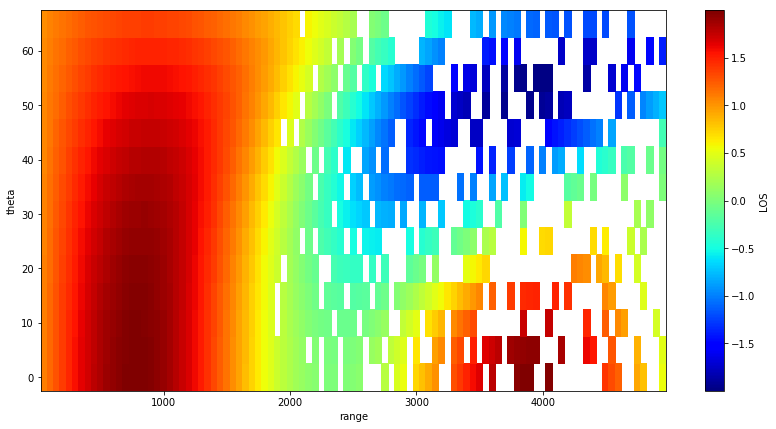

In [102]:
# Plotting in the dimensions spaces. This is just like a plot on a regular grid
ds.LOS.plot(cmap='jet')

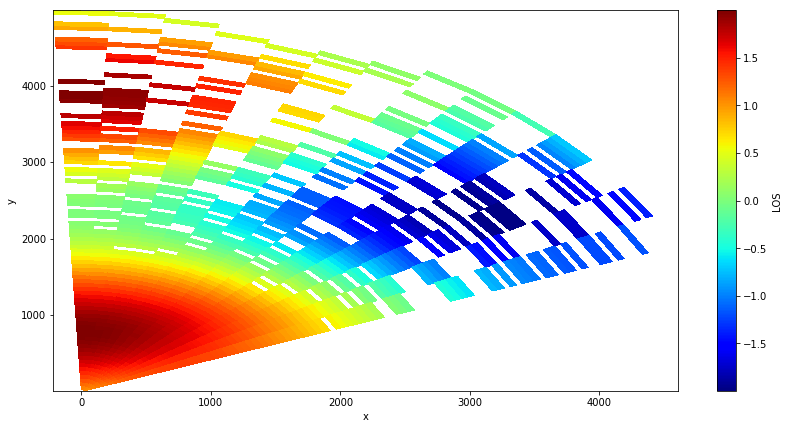

In [101]:
# Adding flags for using the coordinates of the dataset for the plot. 
ds.LOS.plot(x='x',y='y',cmap='jet')